# CSMODEL S11 | Project Phase 1
This notebook is the work of Group 4, consisting of the following members:

* CARNEY, JOHN PAUL COMPANIA
* GUERRRERO, MIGUEL ALFONSO DAVID
* SALVADOR, JARYLL FRANCIS PENA

## Dataset Description
This project makes use of the [Online Gaming Anxiety Data Set](https://www.kaggle.com/datasets/divyansh22/online-gaming-anxiety-data). It contains responses gathered from a worldwide survey of gamers. Included in this survey are psychological assessments for anxiety, social phobia, and life satisfaction. It also gathered demographic and gaming-related information. Marian Sauter and Dejan Draschkow originally compiled the data.


#### Importing Libraries
Before proceeding, we will import the necessary libraries which we will use to provide a general overview of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We then load the dataset as follows:

In [2]:
gamingAnxiety_df = pd.read_csv("GamingStudy_data.csv")
gamingAnxiety_df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


## Process and Implications of Data Collection
The data was gathered by means of a survey that was distributed to gamers globally. The survey had a range of inquiries commonly employed by psychologists to assess levels of anxiety, social phobia, and life satisfaction. Standardized psychological assessment instruments, including the General Anxiety Disorder Assessment (GAD), Satisfaction with Life Scale (SWL), and Social Phobia Inventory (SPIN) questionnaires, and inquiries regarding gaming habits and general demographics were included in the survey. 

Though not explicitly mentioned, it is extremely likely that this survey was conducted online, given that online surveys are commonly used when reaching a worldwide audience, especially gamers. The dataset description also includes *Reddit* as an example for the **Reference** variable, indicating the website was used as an avenue to conduct the survey as well. Assuming the data was collected as such, this presents several implications:

- **Sample Composition**: Because the data was collected through an online survey, it may over-represent individuals active in online gaming communities or gamers who primarily play online multiplayer games. As a result, those who do not regularly use the internet, are inactive in online gaming communities, or those who play single-player games exclusively may be underrepresented.

- **Voluntary Response Bias**: The data relies on self-reported responses, which can be subject to biases such as inaccurate self-assessment by the respondent or social desirability bias. Respondents with stronger views also may have been more likely to participate in the first place because of this.

**Each row** represents a single survey response from a gamer, and **each column** represents a variable collected in the survey. The dataset contains **13464 observations** in total, and there are **55 variables** in the dataset. We can verify this, and also check each individual variable using the info() method:

In [3]:
gamingAnxiety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

**Demographic Information**
- **S. No.:** Serial Number.  
- **Timestamp:** Time at which the participant took the questionnaire after it being launched.  
- **Gender:** Self-identified gender of the gamer taking the questionnaire.  
- **Age:** Self-reported age of the gamer taking the questionnaire.  
- **Work:** Work status of the gamer.  
- **Degree:** Highest degree attained.  
- **Birthplace:** Birthplace.  
- **Residence:** Place where the gamer currently resides.  
- **Residence_ISO3:** Current residence in ISO3 format.  
- **Birthplace_ISO3:** Birthplace in ISO3 format.
- **Accept:** Accept terms and conditions (not necessary for any analysis).  

**Psychological Assessment Statistics**
- **GAD1 to GAD7:** Responses to GAD questions 1 to 7.  
- **GADE:** Effect of gaming on work.  
- **SWL1 to SWL5:** Responses to SWL questions 1 to 5.  
- **SPIN1 to SPIN17:** Responses to SPIN questions 1 to 17.  
- **Narcissism:** Interest scale in the game (1-5).  
- **GAD_T:** GAD Total Score.  
- **SWL_T:** SWL Total Score.  
- **SPIN_T:** SPIN Total Score.  

****Gaming Habits****
- **Game:** Name of the game they play.  
- **Platform:** Mode of game playing (PC, Console, Mobile, etc.).  
- **Hours:** Number of hours in a week devoted to playing.  
- **earnings:** Earnings from the game (if any).  
- **whyplay:** Reason to play the game.  
- **League:** Respondent's current ingame rank.  
- **highestleague:** Highest rank attained.  
- **streams:** Number of online streaming sessions.


#### Data Cleaning 

Next, we prepare our dataset for modeling and analysis. We start by removing the variables that we are certain we will not be using at this point.

**Columns with Inconsistent Formatting and Irrelevant to EDA:**
- highestleague
- League
- Playstyle

**Columns Not Relevant to the EDA:**
- accept
- Birthplace
- Degree
- earnings
- GADE
- Narcissism
- Reference
- Residence
- streams
- Work

In [4]:
gamingAnxiety_df = gamingAnxiety_df.drop(columns=['accept', 
                                                  'Birthplace',
                                                  'Degree', 'earnings', 'GADE', 
                                                  'highestleague', 'League', 'Narcissism', 
                                                  'Reference', 'Residence', 
                                                  'streams', 'Work', 'Playstyle'])
gamingAnxiety_df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,...,SPIN15,SPIN16,SPIN17,Gender,Age,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,3,...,0.0,1.0,0.0,Male,25,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,3,...,3.0,1.0,2.0,Male,41,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,2,...,4.0,4.0,2.0,Female,32,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,2,...,1.0,0.0,0.0,Male,28,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,2,...,0.0,3.0,0.0,Male,19,14,14,13.0,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,42057.75678,1,0,0,1,0,1,1,6,...,1.0,0.0,0.0,Male,22,4,28,7.0,FRA,FRA
13460,14247,42057.81185,3,3,3,3,2,3,3,5,...,1.0,0.0,1.0,Female,20,20,23,25.0,USA,USA
13461,14248,42058.16964,0,0,0,0,0,0,0,6,...,0.0,0.0,0.0,Male,19,0,32,10.0,NOR,NOR
13462,14249,42058.24420,3,2,1,3,0,1,3,2,...,2.0,0.0,1.0,Female,18,13,16,32.0,CAN,CAN


#### Handling Null Values 
This section will place focus on the Psychological Assessment variables as well as the gaming habits. To start, we drop variables that are irrelevant to our study. We will then start looking for variables with null values. We do this by iterating over each column and checking how many null-valued cells each of these may have.

In [5]:
nullVariables = gamingAnxiety_df.columns[gamingAnxiety_df.isnull().any()].tolist()
gamingAnxiety_df[nullVariables].isnull().sum()

Hours               30
SPIN1              124
SPIN2              154
SPIN3              140
SPIN4              159
SPIN5              166
SPIN6              156
SPIN7              138
SPIN8              144
SPIN9              158
SPIN10             160
SPIN11             187
SPIN12             168
SPIN13             187
SPIN14             156
SPIN15             147
SPIN16             147
SPIN17             175
SPIN_T             650
Residence_ISO3     110
Birthplace_ISO3    121
dtype: int64

*Imputation*<br>
Most variables here have a relatively low amount off null values (Less than 5%). We might first consider dropping this data given how few they are, we will choose to perform imputation to preserve our sample size and maintain the variability of our dataset. Furthermore, if the missing cells are scattered (i.e. many rows only have one or two cells missing), then we may end up dropping a deceptively high amount of rows rather than just a few hundred. At worst, we may end up dropping a number of rows equal to the sum of the number of null values we have. 


Before we start, we must decide what imputation method to use for our numerical data. We might choose to impute by mean as a straightforward method for imputation. However, we may produce imputed values far from the central tendency due to the mean's sensitivity to outliers, if such values exist in our dataset. In such a case, we might instead opt for median imputaton to find a better central value. As such, we will examine the data accordingly and assign imputation methods on a case-to-case basis.

To start, we display numerical summaries of every column with null values in our dataframe and seek out columns with outliers.

In [6]:
summary_stats = gamingAnxiety_df[nullVariables].describe(percentiles=[.25, .50, .75, .99]).round(2)

print("Summary Statistics Before Imputation:")
print(summary_stats)

Summary Statistics Before Imputation:
          Hours     SPIN1     SPIN2     SPIN3     SPIN4     SPIN5     SPIN6  \
count  13434.00  13340.00  13310.00  13324.00  13305.00  13298.00  13308.00   
mean      22.25      0.86      1.21      1.10      1.68      1.25      1.35   
std       70.28      0.91      1.14      1.16      1.23      1.22      1.28   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%       12.00      0.00      0.00      0.00      1.00      0.00      0.00   
50%       20.00      1.00      1.00      1.00      2.00      1.00      1.00   
75%       28.00      1.00      2.00      2.00      3.00      2.00      2.00   
99%       70.00      4.00      4.00      4.00      4.00      4.00      4.00   
max     8000.00      4.00      4.00      4.00      4.00      4.00      4.00   

          SPIN7     SPIN8     SPIN9    SPIN10    SPIN11    SPIN12    SPIN13  \
count  13326.00  13320.00  13306.00  13304.00  13277.00  13296.00  13277.00   
mean       1.

We can see that Hours has a max value of 8000, but 99% of its values exist under 70. In the interest of preserving the dataset from extreme outliers, we will impute according to the median.

In [7]:
gamingAnxiety_df['Hours'] = gamingAnxiety_df['Hours'].fillna(gamingAnxiety_df['Hours'].median())

If we review the [SPIN](https://greenspacehealth.com/en-us/social-anxiety-spin/) questionnaire, we see that this is a categorical, numerical value that can be 0, 1, 2, 3, or 4. We also find no indication that any individual question is intended to be skipped. Because of this, we will opt to impute for every missing value.

Unlike for the *Hours,* we will neither perform mean nor median impuation as this may produce a non categorical value (e.g 2.5). Instead, we will use mode imputation to prevent this. And, since SPIN_T is only a total of SPIN, we can simply recalculate the total of the SPIN questions for each individual row. By doing this, we've preserved the accuracy of our SPIN_T values, whether the missing value originated from an individual SPIN question or from the total itself. We'll also include Residence and Birthplace here in our mode imputation, seeing as these are categorical veriables as well.

In [8]:
# Choosing which columns to impute
columns_to_impute = ['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 
                     'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 
                     'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 
                     'SPIN16', 'SPIN17', 'Residence_ISO3', 'Birthplace_ISO3']

# Mode imputation
for column in columns_to_impute:
    mode_value = gamingAnxiety_df[column].mode().iloc[0]
    gamingAnxiety_df[column] = gamingAnxiety_df[column].fillna(mode_value)

With SPIN1-17 having been imputed, we can recalculate SPIN_T. This is as simple as taking each row, getting the sum of SPIN1-17, and assigning that value to SPIN_T.

In [9]:
spin_columns = [f'SPIN{i}' for i in range(1, 18)]
gamingAnxiety_df['SPIN_T'] = gamingAnxiety_df[spin_columns].sum(axis=1)


Let's verify that we've successfully performed the imputation:

In [10]:
gamingAnxiety_df[nullVariables].isnull().sum()

Hours              0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
SPIN_T             0
Residence_ISO3     0
Birthplace_ISO3    0
dtype: int64

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a crucial step in understanding the characteristics and underlying patterns in our dataset. In this study, we conducted a comprehensive EDA to explore the psychological measures of anxiety, life satisfaction, and social phobia among gamers worldwide. 

In [11]:
gamingAnxiety_df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,...,SPIN15,SPIN16,SPIN17,Gender,Age,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,3,...,0.0,1.0,0.0,Male,25,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,3,...,3.0,1.0,2.0,Male,41,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,2,...,4.0,4.0,2.0,Female,32,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,2,...,1.0,0.0,0.0,Male,28,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,2,...,0.0,3.0,0.0,Male,19,14,14,13.0,KOR,USA


#### I. Distribution of Key Psychological Measures
What is the distribution of anxiety, life satisfaction, and social phobia scores among gamers?

To answer this we take have to take a comprehensive look into the psychological state of the respondents and, to analyze the distribution of three key psychological measures: anxiety scores (GAD_T), life satisfaction scores (SWL_T), and social phobia scores (SPIN_T). First we will construct numerical summaries and measure central tendencies, dispersion and correlation between the variables.  We will then use histograms to visualize the frequency distributions of these measures, as they provide an intuitive way to see how scores are spread across different ranges and to identify common patterns and abnormalities.

**Numerical Summaries:**

In [12]:
# Retrieving summaries for Platform, Game, GAD_T, SWL_T, and SPIN_T
vars = ['GAD_T', 'SWL_T', 'SPIN_T']

median = gamingAnxiety_df[vars].median().round(2)

mode = gamingAnxiety_df[vars].mode().round(2).iloc[0]  

summary_stats = gamingAnxiety_df[vars].describe().round(2)

summary_stats.loc['median'] = median
summary_stats.loc['mode'] = mode

print("Numerical Summaries of GAD_T, SWL_T and SPIN_T:")
print(summary_stats)


Numerical Summaries of GAD_T, SWL_T and SPIN_T:
           GAD_T     SWL_T    SPIN_T
count   13464.00  13464.00  13464.00
mean        5.21     19.79     19.64
std         4.71      7.23     13.47
min         0.00      5.00      0.00
25%         2.00     14.00      9.00
50%         4.00     20.00     17.00
75%         8.00     26.00     28.00
max        21.00     35.00     68.00
median      4.00     20.00     17.00
mode        0.00     24.00     11.00


From the numerical summaries we can see that GAD_T has the smallest mean at 5.21 with the lowest standard deviation, while SWL_T and SPIN_T respectively have similar means of 19.79 and 19.64, however have have different dispersions with standard deviations of 7.23 and 13.14. We can gleam from this that most respondents have low anxiety scores and phobia scores while having middling life satisfaction scores. We can further confirm this through the histograms below.

**Visualization:**

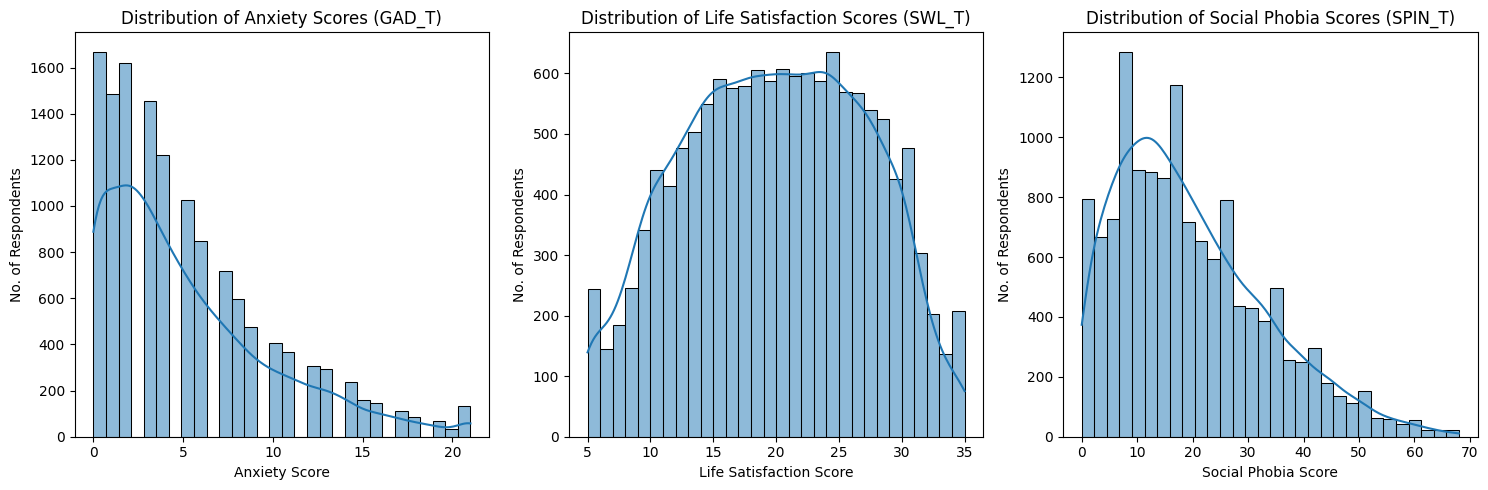

In [13]:
plt.figure(figsize=(15, 5))

#Anxiety Distribution
plt.subplot(1, 3, 1)
sns.histplot(gamingAnxiety_df['GAD_T'], kde=True, bins=30)
plt.title('Distribution of Anxiety Scores (GAD_T)')
plt.xlabel('Anxiety Score')
plt.ylabel('No. of Respondents')

#Life Satisfaction Distribution
plt.subplot(1, 3, 2)
sns.histplot(gamingAnxiety_df['SWL_T'], kde=True, bins=30)
plt.title('Distribution of Life Satisfaction Scores (SWL_T)')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('No. of Respondents')

plt.subplot(1, 3, 3)
sns.histplot(gamingAnxiety_df['SPIN_T'], kde=True, bins=30)
plt.title('Distribution of Social Phobia Scores (SPIN_T)')
plt.xlabel('Social Phobia Score')
plt.ylabel('No. of Respondents')

plt.tight_layout()
plt.show()


The data given shows that the anxiety frequency distribution has most respondents have lower anxiety score. The distribution of anxiety scores shows that most of the respondents medium to high life satisfaction scores. Lastly, the social phobia scores shows that most respondents have a lower phobia scores, with fewer respondents reporting higher levels of social phobia.

Let's explain it more. For the anxiety frequency distribution or the GAD-T, it shows a right-skewed distribution that indicates most repsondents have lower anxiety scores, The distribution helps us understand that anxiety levels are generally low among the respondents, with some outliers experiencing higher levels of anxiety. We can apply this data by analyzing this distrubtion, we can identify the proportion of respondents experiencing varying degrees of anxiety, which can help in data gathering and usage. For the Life Satisfaction scores, or the SWL_T, the histogram displays the distribution with a slightly left-skewed shape suggesting most respondents have moderate to high life satisfaction, or they're currently happy with their lives right now. This shows that the overall sample of respondents have a overall well-being. Now for the Social Phobia Scores or SPIN_T, the histogram shows the distribution is a right-skewed shape indicating that most repsondents have a lower social phobia score. Showing that social anxiety is not a significant issue for most of the respondents, with only a small minority experiencing high levels of social phobia. 

**Conclusion**

According to the data given, the distribution when it comes to the GAD-T shows that most of the respondents have lower anxiety scores, we can assume that majority of the respondents do not have any problems with anxiety. Same with the others, as the graph shows that the SWL-T although left-skewed shows that majority of the respondents are quite happy with their lives. SPIN-T graphs shows that majority of the respondents do not suffer from social phobia and only a small minority do. 

#### II. Potential Correlations of Gaming Hours with Pyschological Measures
Here, we seek to answer the question "Do gaming hours per week correlate with anxiety, life satisfaction, and social phobia scores?" We will proceed with the numerical summaries similarly to our first EDA and so on for our third and fourth. 

**Numerical Summaries**

In [14]:
# Retrieving correlation coefficients for Hours, Platform, Game, GAD_T, SWL_T, and SPIN_T
vars = ['Hours', 'GAD_T', 'SWL_T', 'SPIN_T']

median = gamingAnxiety_df[vars].median().round(2)
mode = gamingAnxiety_df[vars].mode().round(2).iloc[0]  
summary_stats = gamingAnxiety_df[vars].describe().round(2)

summary_stats.loc['median'] = median
summary_stats.loc['mode'] = mode

correlations = gamingAnxiety_df[['Hours', 'GAD_T', 'SWL_T', 'SPIN_T']].corr().round(2)

print("Numerical Summaries of GAD_T, SWL_T and SPIN_T:")
print(summary_stats)

print("\nCorrelations between variables:")
print(correlations)

Numerical Summaries of GAD_T, SWL_T and SPIN_T:
           Hours     GAD_T     SWL_T    SPIN_T
count   13464.00  13464.00  13464.00  13464.00
mean       22.24      5.21     19.79     19.64
std        70.21      4.71      7.23     13.47
min         0.00      0.00      5.00      0.00
25%        12.00      2.00     14.00      9.00
50%        20.00      4.00     20.00     17.00
75%        28.00      8.00     26.00     28.00
max      8000.00     21.00     35.00     68.00
median     20.00      4.00     20.00     17.00
mode       20.00      0.00     24.00     11.00

Correlations between variables:
        Hours  GAD_T  SWL_T  SPIN_T
Hours    1.00   0.01  -0.04    0.05
GAD_T    0.01   1.00  -0.40    0.45
SWL_T   -0.04  -0.40   1.00   -0.31
SPIN_T   0.05   0.45  -0.31    1.00


From the numerical summaries we can see that hours has the a median of 20, which is more representative of its average as it has extreme outliers, explaining its high standard deviation of 70.21. Assessing the correlation coefficients between our variables, we can see that none of our variables have correlation coefficients above 0.50, suggesting that there is little to no correlation between them. We can further understand this through scatterplots. 

**Visualization**

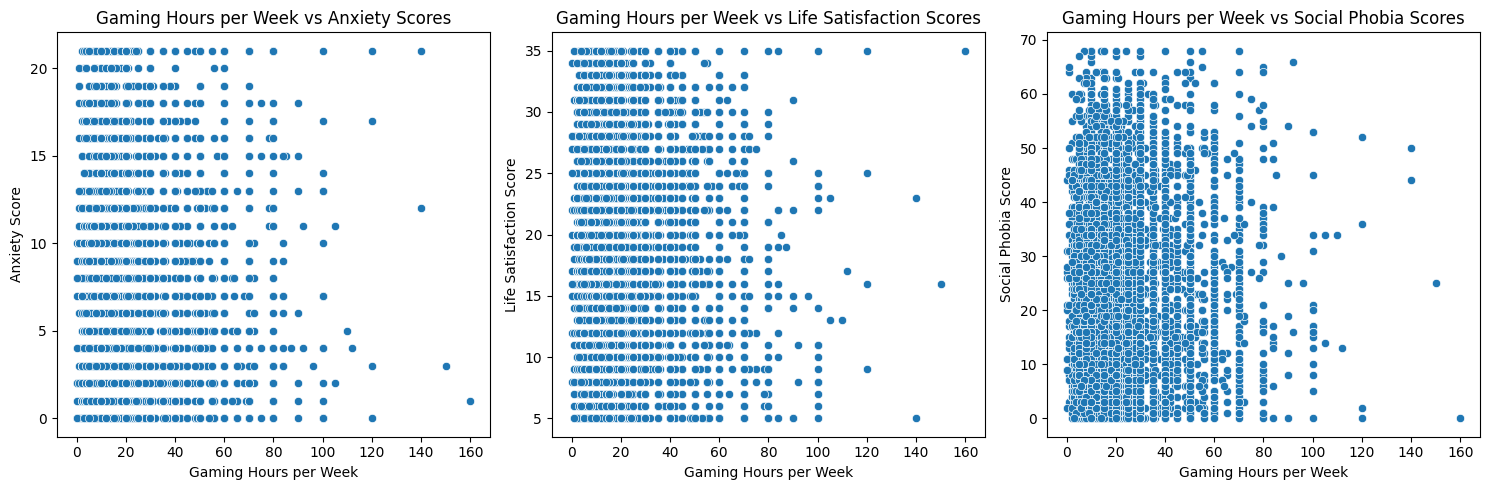

In [15]:
gamingAnxiety_df = gamingAnxiety_df[gamingAnxiety_df['Hours'] <= 200]
plt.figure(figsize=(15, 5))

#Hours vs Anxiety
plt.subplot(1, 3, 1)
sns.scatterplot(x='Hours', y='GAD_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Anxiety Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Anxiety Score')

#Hours vs Life Satisfaction
plt.subplot(1, 3, 2)
sns.scatterplot(x='Hours', y='SWL_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Life Satisfaction Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Life Satisfaction Score')

#Hours vs Social Phobia
plt.subplot(1, 3, 3)
sns.scatterplot(x='Hours', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Social Phobia Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Social Phobia Score')

plt.tight_layout()
plt.show()

Scatterplots are best used when trying to visualize a relationship between two continous variables. Here we attempt to visualize any potential relationship between GAD_T, SPIN_T, and SWL_T.

From visuals alone, there is no obvious trend between gaming hours per week and these variables. One thing of note, however, is that the dots tend to be concentrated towards the left side of the graph. This skewness does indicate that the dataset represents more observations with lower gaming hours per week. Besides this, there is little more that can be gathered from looking at the graph alone.

**Conclusion**

Attempting to visualize potential relationships between gaming hours and anxiety, social phobia, and life satisfaction shows no clear trend. However, the concentration of dots on the left suggests lower gaming hours overall.

#### III. Demographic Breakdown (Age, Gender, Nationality) of Gamers

Next, we ask what is the demographic breakdown (age, gender, nationality) of gamers in the survey?

**Numerical Summaries:**

In [16]:
# Retrieving summaries for Age, Gender, and Birthplace
vars = ['Age', 'Gender', 'Birthplace_ISO3']

mode = gamingAnxiety_df[vars].mode().iloc[0]

summary_stats_age = gamingAnxiety_df['Age'].describe().round(2)

summary_stats_age['median'] = round(gamingAnxiety_df['Age'].median(),2)
summary_stats_age['mode'] = mode['Age']

summary_stats_gender = gamingAnxiety_df['Gender'].value_counts().to_frame(name='count')
summary_stats_birthplace = gamingAnxiety_df['Birthplace_ISO3'].value_counts().to_frame(name='count')

print("Summary Statistics for Age:")
print(summary_stats_age)

print("\nMode for Gender and Birthplace_ISO3:")
print(mode[['Gender', 'Birthplace_ISO3']])

print("\nValue Counts for Gender:")
print(summary_stats_gender)

print("\nValue Counts for Birthplace_ISO3:")
print(summary_stats_birthplace)


Summary Statistics for Age:
count     13462.00
mean         20.93
std           3.30
min          18.00
25%          18.00
50%          20.00
75%          22.00
max          63.00
median       20.00
mode         18.00
Name: Age, dtype: float64

Mode for Gender and Birthplace_ISO3:
Gender             Male
Birthplace_ISO3     USA
Name: 0, dtype: object

Value Counts for Gender:
        count
Gender       
Male    12699
Female    713
Other      50

Value Counts for Birthplace_ISO3:
                 count
Birthplace_ISO3       
USA               4380
DEU               1376
GBR                940
CAN                842
NLD                503
...                ...
ETH                  1
VCT                  1
GIB                  1
BRN                  1
MAC                  1

[124 rows x 1 columns]


From the numerical summaries we can see that most respondents are age 18-21, Male and reside in the USA. There is an abundance of male respondents, with 12699 males outnumbering 713 females, with an extreme minority of respondents listed as 'Other'. The spread of nationalities is similar to the two, with USA respondents outnumbering the second highest answered nationality, Germany, at 4380 to 1376. We can further understand these demographics through a barplot.

**Visualization**

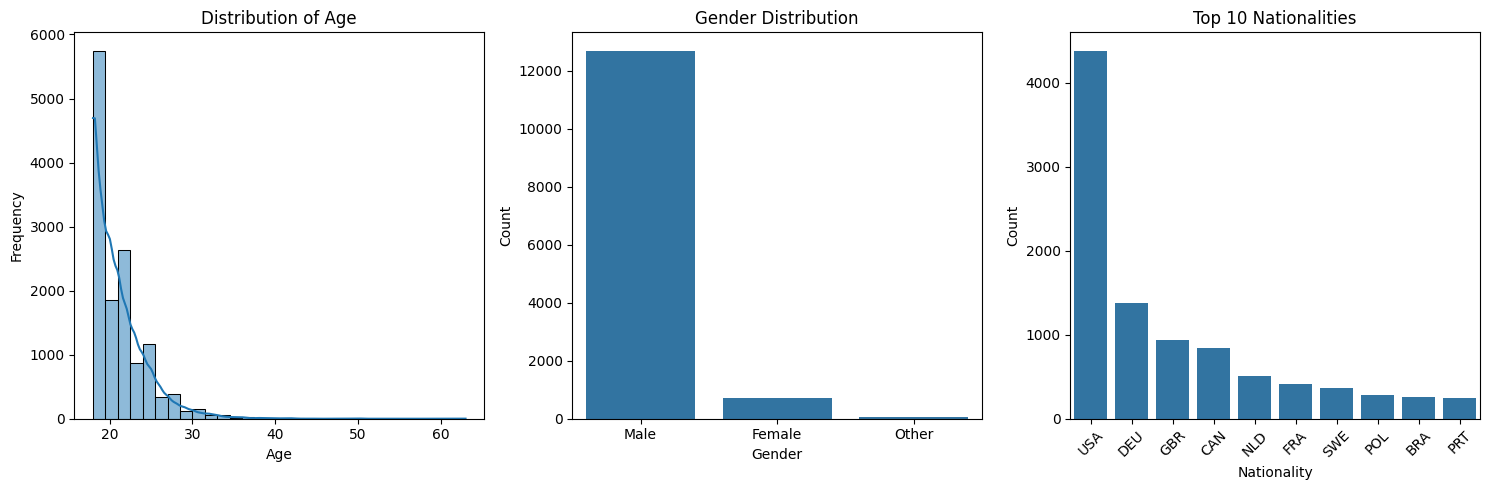

In [17]:
# Graph for Age Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(gamingAnxiety_df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Graph for Gender Distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=gamingAnxiety_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Graph of the top 10 nationalities
plt.subplot(1, 3, 3)
top_nationalities = gamingAnxiety_df['Birthplace_ISO3'].value_counts().head(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.title('Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

With the first graph being the age distribution we can see that the majority of the respondents are in their mid-20s, with fewer respondents on the outliers, being younger and older age extremes. The second graph shows the counts of male, female and other respondents. It is apparent that the respondents of this dataset is majorly males, with smaller proportions of female and other genders. The last graph being the top 10 nationalities of respondents. These are namely USA, Germany, UK, Canada, Netherlands, France, Sweden, Poland, Brazil and Portugal.

Let's dive in deeper in the graphs. The first graph shows that the peak respondent age is mid-20s, this shows that the age group is highly represented in this sampling, then we have more extremes reaching up to 60, showing that gaming is not a phase but a passion for some people. The second graph shows that majority of the respondents are male, we can use this for mental health data research and in indentifying target demographics. The last graph is again, the Top 10 Nationalities, showing USA as first, then Germany. The data also shows that 80% of the Top 10 countries are in Europe.

**Conclusion**

The vast majoriy of gamers from the dataset are below the age of 20, Male, and from the USA.

#### IV. Distribution of Psychological Measures across Preferred Platform and Game Genre

For our final question, we ask, "What is the distribution of Psychological Measures across individuals' preferred platform and game genre?

**Numerical Summaries:**

In [18]:
# Retrieving summaries for Platform and Game against Psychological Statistics
vars = ['Platform', 'Game', 'GAD_T', 'SWL_T', 'SPIN_T']

mode = gamingAnxiety_df[vars].mode().iloc[0]

numerical_vars = ['GAD_T', 'SWL_T', 'SPIN_T']
summary_stats_numerical = gamingAnxiety_df[numerical_vars].describe().round(2)

median = gamingAnxiety_df[numerical_vars].median().round(2)

summary_stats_numerical.loc['median'] = median
summary_stats_numerical.loc['mode'] = mode[numerical_vars]
summary_stats_numerical = summary_stats_numerical.round(2)
summary_stats_platform = gamingAnxiety_df['Platform'].value_counts().to_frame(name='count')
summary_stats_game = gamingAnxiety_df['Game'].value_counts().to_frame(name='count')

print("Summary Statistics for Numerical Variables:")
print(summary_stats_numerical)

print("\nMode for Categorical Variables:")
print(mode[['Platform', 'Game']])

print("\nValue Counts for Platform:")
print(summary_stats_platform)

print("\nValue Counts for Game:")
print(summary_stats_game)

Summary Statistics for Numerical Variables:
           GAD_T     SWL_T    SPIN_T
count   13462.00  13462.00  13462.00
mean        5.21     19.79     19.64
std         4.71      7.23     13.47
min         0.00      5.00      0.00
25%         2.00     14.00      9.00
50%         4.00     20.00     17.00
75%         8.00     26.00     28.00
max        21.00     35.00     68.00
median      4.00     20.00     17.00
mode        0.00     24.00     11.00

Mode for Categorical Variables:
Platform                   PC
Game        League of Legends
Name: 0, dtype: object

Value Counts for Platform:
                         count
Platform                      
PC                       13218
Console (PS, Xbox, ...)    222
Smartphone / Tablet         22

Value Counts for Game:
                     count
Game                      
League of Legends    11313
Other                 1020
Starcraft 2            345
Counter Strike         318
World of Warcraft      152
Hearthstone            101
Diablo 3  

From the numerical summaries we can see that most respondents play on PC and play League of Legends. PC players outnumber the second closest platform, console players at 13218 to 222. Similarly, League of Legends players have the highest number of respondents playing it, with the closest second being 'Other', suggesting 1020 players play a game that might not be listed in the survey. We can understand these statistics better through boxplots.

**Visualization:**

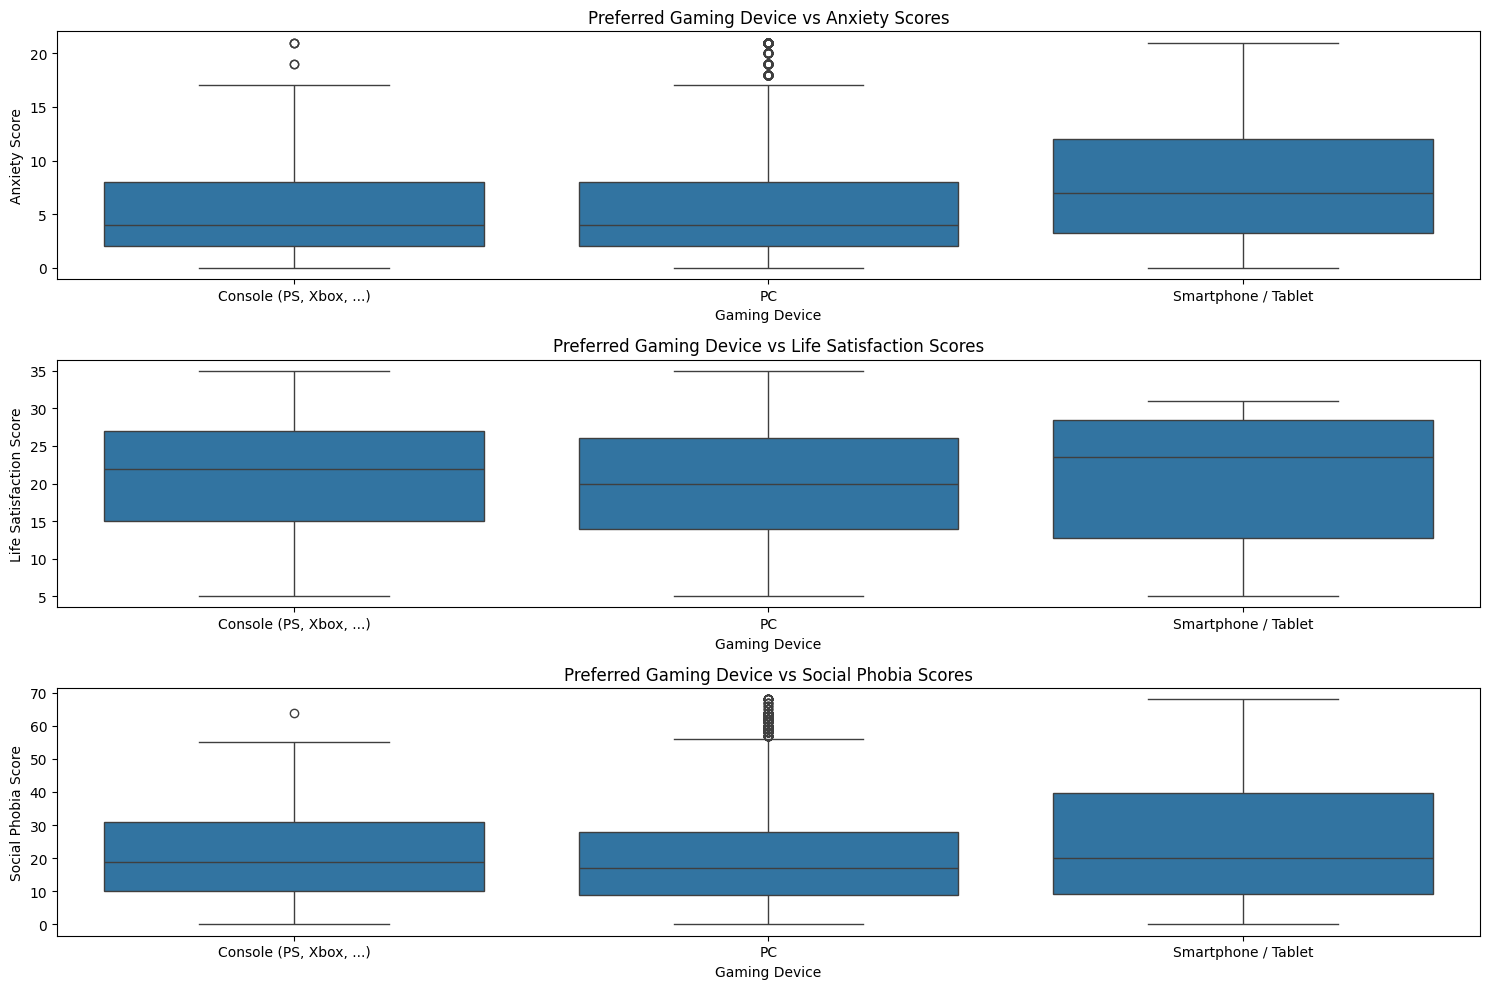

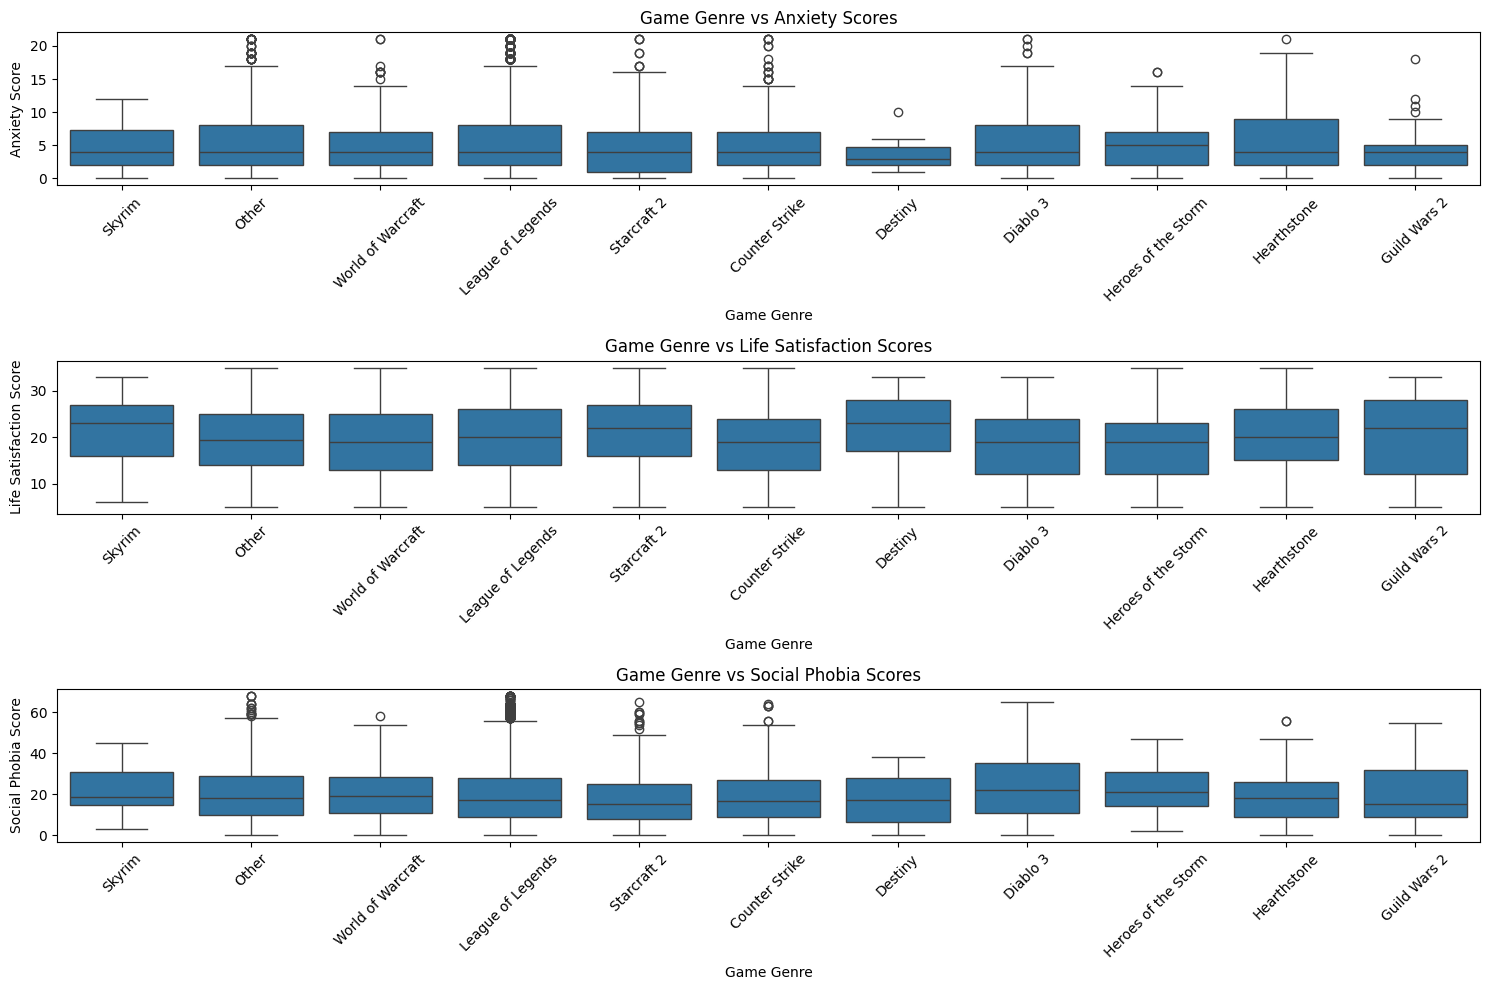

In [19]:
# Preferred gaming device and psychological measures
plt.figure(figsize=(15, 10))

# Device vs Anxiety
plt.subplot(3, 1, 1)
sns.boxplot(x='Platform', y='GAD_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Anxiety Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Anxiety Score')

# Device vs Life Satisfaction
plt.subplot(3, 1, 2)
sns.boxplot(x='Platform', y='SWL_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Life Satisfaction Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Life Satisfaction Score')

# Device vs Social Phobia
plt.subplot(3, 1, 3)
sns.boxplot(x='Platform', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Social Phobia Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Social Phobia Score')

plt.tight_layout()
plt.show()

# Game genre and psychological measures
plt.figure(figsize=(15, 10))

# Genre vs Anxiety
plt.subplot(3, 1, 1)
sns.boxplot(x='Game', y='GAD_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Anxiety Scores')
plt.xlabel('Game Genre')
plt.ylabel('Anxiety Score')
plt.xticks(rotation=45)

# Genre vs Life Satisfaction
plt.subplot(3, 1, 2)
sns.boxplot(x='Game', y='SWL_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Life Satisfaction Scores')
plt.xlabel('Game Genre')
plt.ylabel('Life Satisfaction Score')
plt.xticks(rotation=45)

# Genre vs Social Phobia
plt.subplot(3, 1, 3)
sns.boxplot(x='Game', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Social Phobia Scores')
plt.xlabel('Game Genre')
plt.ylabel('Social Phobia Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


A boxplot is extremely useful here as it displays a range of data and highlights central tendency, and how differeng genres and platforms may affect these.

The graph shows that in mobile users tend to have GAD_T, SWL_T and SPIN_T scores compared to PC and console users. Interestingly, PC players noticeably have more outliers compared to the rest, leaning towards high GAD_T and SPIN_T.

Though there are differences in the median scores, the most striking observations about the game genre graphs are the high amount of outliers presenting high GAD_T and high SPIN_T scores for games like League of Legends and Counter Strike, games known to be highly competitive. This may present an opportunity for feature engineering, classifying the games with regards to how competitive they are.

**Conclusion**

Anxiety, Social Phobia and Satisfaction with life tends to be higher for mobile users. High-score outliers are also noticeable with regards to social phobia and anxiety for competitive games.

#### Research Question

Our exploratory data analysis tells us that most respondents have low levels of anxiety, social phobia and middling life satisfaction, that there is little correlation between gaming hours and psychological measures, that the demographic is mainly composed of 20 year-old males in the USA, and that psychological scores tend to be higher in mobile users. Of all of the questions we've attempted to answer through EDA, the most diverse in the amount of data we can use is with regards to  finding the distribution of preferred game, gaming device and psychological measures.  We might attempt to compare psychological measures to games and platforms, however an exploratory data analysis is not sufficient to answer this question. It also appears that the highlight of this dataset is indeed the psychological measures (SPIN, SWL, and GAD). As such, we want to maximize the use of this data. Our research question, therefore, is as follows:

**How are different gaming devices and genres related to psychological metrics?**


## Data Modelling

With our research question defined, we can start performing data modelling. For this, we will perform association rule mining. This is helpful as it can help us find any hidden patterns that might exist within the dataset. Before we proceed, we'll have to do some preprocessing to ensure our data is usable.

##### One-Hot Encoding
We'll start with the games and platforms. For these to be useable by our algorithms, we'll perform one-hot encoding to represent each game/platform.

In [20]:
games_df = pd.get_dummies(gamingAnxiety_df['Game'])
platform_df = pd.get_dummies(gamingAnxiety_df['Platform'])

We verify the new dataframes:

In [21]:
games_df

,Counter Strike,Destiny,Diablo 3,Guild Wars 2,Hearthstone,Heroes of the Storm,League of Legends,Other,Skyrim,Starcraft 2,World of Warcraft
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
13459,False,False,False,False,False,False,False,True,False,False,False
13460,False,False,False,False,False,False,True,False,False,False,False
13461,False,False,False,False,False,False,False,False,False,True,False
13462,False,False,False,False,False,False,False,True,False,False,False


In [22]:
platform_df

,"Console (PS, Xbox, ...)",PC,Smartphone / Tablet
0,True,False,False
1,False,True,False
2,False,True,False
3,False,True,False
4,True,False,False
...,...,...,...
13459,True,False,False
13460,False,True,False
13461,False,True,False
13462,True,False,False


##### Feature Engineering
If we want to do the same for our psychological metrics, we'll need to bin them first according to each score's appropriate evaluation. First, we'll perform this for the GAD scores, and give each score its [appropriate label.](https://adaa.org/sites/default/files/GAD-7_Anxiety-updated_0.pdf) GAD scores from 0 to 4 will be labeled "Minimal Anxiety," scores from 5 to 9 "Mild Anxiety" and so on.

In [23]:
# Assign a label for each level of anxiety
def categorizeAnxiety(score):
    if score >= 0 and score <= 4:
        return 'Minimal Anxiety'
    elif score >= 5 and score <= 9:
        return 'Mild Anxiety'
    elif score >= 10 and score <= 14:
        return 'Moderate Anxiety'
    elif score >= 15 and score <= 21:
        return 'Severe Anxiety'
    else:
        return 'Invalid Score'

#Create new column with categorized Anxiety
gamingAnxiety_df['Anxiety_Level'] = gamingAnxiety_df['GAD_T'].apply(categorizeAnxiety)

#Display newly created  Column
gadt_df = gamingAnxiety_df['Anxiety_Level']
gadt_df

C:\Users\Miguel\AppData\Local\Temp\ipykernel_11844\3515567758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamingAnxiety_df['Anxiety_Level'] = gamingAnxiety_df['GAD_T'].apply(categorizeAnxiety)


0         Minimal Anxiety
1            Mild Anxiety
2            Mild Anxiety
3         Minimal Anxiety
4        Moderate Anxiety
               ...       
13459     Minimal Anxiety
13460      Severe Anxiety
13461     Minimal Anxiety
13462    Moderate Anxiety
13463     Minimal Anxiety
Name: Anxiety_Level, Length: 13462, dtype: object

Now that we've successfully categorized the anxiety levels, we'll use one-hot encoding to represent the data:

In [24]:
gadt_df = pd.get_dummies(gadt_df)
gadt_df

,Mild Anxiety,Minimal Anxiety,Moderate Anxiety,Severe Anxiety
0,False,True,False,False
1,True,False,False,False
2,True,False,False,False
3,False,True,False,False
4,False,False,True,False
...,...,...,...,...
13459,False,True,False,False
13460,False,False,False,True
13461,False,True,False,False
13462,False,False,True,False


We will then perform the same binning method for both [SPIN](https://greenspacehealth.com/en-us/social-anxiety-spin/) and [SWL.](https://fetzer.org/sites/default/files/images/stories/pdf/selfmeasures/SATISFACTION-SatisfactionWithLife.pdf)

In [25]:
# Assign a label for each level of social phobia
def categorizeSocialPhobia(score):
    if score >= 0 and score <= 20:
        return 'No Social Phobia'
    elif score >= 21 and score <= 30:
        return 'Mild Social Phobia'
    elif score >= 31 and score <= 40:
        return 'Moderate Social Phobia'
    elif score >= 41 and score <= 50:
        return 'Severe Social Phobia'
    elif score >= 51 and score <= 68:
        return 'Very Severe Social Phobia'
    else:
        return 'Invalid Score'

#Create new column with categorized Anxiety
gamingAnxiety_df['SocialPhobia'] = gamingAnxiety_df['SPIN_T'].apply(categorizeSocialPhobia)

#Display newly created  Column
spint_df = gamingAnxiety_df['SocialPhobia']
spint_df = pd.get_dummies(spint_df)

C:\Users\Miguel\AppData\Local\Temp\ipykernel_11844\1859008845.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamingAnxiety_df['SocialPhobia'] = gamingAnxiety_df['SPIN_T'].apply(categorizeSocialPhobia)


In [26]:
# Assign a label for each level of social phobia
def categorizeLifeSatisfaction(score):
    if score >= 5 and score <= 9:
        return 'Extreme Life Dissatisfaction'
    elif score >= 10 and score <= 14:
        return 'Moderate Life Dissatisfaction'
    elif score >= 15 and score <= 19:
        return 'Slight Life Dissatisfaction'
    elif score == 20:
        return 'Neutral Life Satisfaction'
    elif score >= 21 and score <= 25:
        return 'Slight Life Satisfaction'
    elif score >= 26 and score <= 30:
        return 'Moderate Life Satisfaction'
    elif score >= 31 and score <= 35:
        return 'Extreme Life Satisfaction'
    else:
        return 'Invalid Score'

#Create new column with categorized Anxiety
gamingAnxiety_df['Life Satisfaction'] = gamingAnxiety_df['SWL_T'].apply(categorizeLifeSatisfaction)

#Display newly created  Column
swlt_df = gamingAnxiety_df['Life Satisfaction']
swlt_df= pd.get_dummies(swlt_df)

C:\Users\Miguel\AppData\Local\Temp\ipykernel_11844\1809744887.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamingAnxiety_df['Life Satisfaction'] = gamingAnxiety_df['SWL_T'].apply(categorizeLifeSatisfaction)


#### Association Rule Mining
With preprocessing finished, we can proceed with data mining. To start, we will generate the frequent itemsets for our dataframes. We do this by first organizing the dataframes we want to generate frequentsets from.

In [27]:
#Combine Anxiety, Social Phobia, and Life Satisfaction Dataframe
psych_df = pd.concat([gadt_df, spint_df, swlt_df], axis = 1)

#Combine Pysch Stats with games and platfor dataframes
psychToGames = pd.concat([psych_df, games_df], axis = 1)
psychToPlatform = pd.concat([psych_df, platform_df], axis = 1)

We can finally generate our frequent itemsets. We will be using *apriori* and *association_rules* from the *mlxtend* library. We'll generate a frequentSets dataframe with the apriori algorithm using psychological metrics as well as game genre statistics. We'll start with a low support, ensuring we don't get too few itemsets before we even proceed with our rule mining.

In [28]:
from mlxtend.frequent_patterns import apriori, association_rules

frequentSetsPsychToGames = apriori(psychToGames, min_support = 0.1, use_colnames = True)
frequentSetsPsychToGames

,support,itemsets
0,0.272322,(Mild Anxiety)
1,0.552964,(Minimal Anxiety)
2,0.119819,(Moderate Anxiety)
3,0.199896,(Mild Social Phobia)
4,0.119150,(Moderate Social Phobia)
5,0.594562,(No Social Phobia)
6,0.177017,(Moderate Life Dissatisfaction)
7,0.188308,(Moderate Life Satisfaction)
8,0.218393,(Slight Life Dissatisfaction)
9,0.221884,(Slight Life Satisfaction)


Immediately from our initial sets, it sticks out that despite our low support threshold, we see no other games besides League of Legends. This is likely due to the nature of the dataset itself, wherein an overwhelmingly large number of respondents had this as their game. We can verify this by checking the value counts of the 'Game' column, doing the same for the 'Platform' column which we will also use later.

In [29]:
gamingAnxiety_df['Game'].value_counts()

Game
League of Legends      11313
Other                   1020
Starcraft 2              345
Counter Strike           318
World of Warcraft        152
Hearthstone              101
Diablo 3                  89
Heroes of the Storm       41
Guild Wars 2              37
Skyrim                    28
Destiny                   18
Name: count, dtype: int64

In [30]:
gamingAnxiety_df['Platform'].value_counts()

Platform
PC                         13218
Console (PS, Xbox, ...)      222
Smartphone / Tablet           22
Name: count, dtype: int64

There is no normalization or standardization we can perform here. We can neither simply drop the rows with the non-dominant game or platform as we would lose too much of our dataset. Instead, we will keep these intricacies in mind for our conclusions later on. 

To continue, let's increase the support threshold for frequentSetsPsychToGames while also finding frequentsets for PsychToPlatfom

In [31]:
frequentSetsPsychToGames = apriori(psychToGames, min_support = 0.2, use_colnames = True)
frequentSetsPsychToPlatform = apriori(psychToPlatform, min_support = 0.2, use_colnames = True)

Lets view our frequentSets:

In [32]:
frequentSetsPsychToGames

,support,itemsets
0,0.272322,(Mild Anxiety)
1,0.552964,(Minimal Anxiety)
2,0.594562,(No Social Phobia)
3,0.218393,(Slight Life Dissatisfaction)
4,0.221884,(Slight Life Satisfaction)
5,0.840365,(League of Legends)
6,0.229238,"(Mild Anxiety, League of Legends)"
7,0.407072,"(No Social Phobia, Minimal Anxiety)"
8,0.465755,"(League of Legends, Minimal Anxiety)"
9,0.501486,"(League of Legends, No Social Phobia)"


In [33]:
frequentSetsPsychToPlatform

,support,itemsets
0,0.272322,(Mild Anxiety)
1,0.552964,(Minimal Anxiety)
2,0.594562,(No Social Phobia)
3,0.218393,(Slight Life Dissatisfaction)
4,0.221884,(Slight Life Satisfaction)
5,0.981875,(PC)
6,0.267568,"(Mild Anxiety, PC)"
7,0.407072,"(No Social Phobia, Minimal Anxiety)"
8,0.543604,"(PC, Minimal Anxiety)"
9,0.585054,"(PC, No Social Phobia)"


With our frequentSets prepared, we can proceed with association rule mining. We'll use a middling confidence level, and perform it for both of the sets we've created.

In [34]:
association_rules(frequentSetsPsychToGames, metric = "confidence", min_threshold = 0.6)[['antecedents', 'consequents', 'support', 'confidence']]

,antecedents,consequents,support,confidence
0,(Mild Anxiety),(League of Legends),0.229238,0.841789
1,(No Social Phobia),(Minimal Anxiety),0.407072,0.684658
2,(Minimal Anxiety),(No Social Phobia),0.407072,0.736163
3,(Minimal Anxiety),(League of Legends),0.465755,0.842289
4,(No Social Phobia),(League of Legends),0.501486,0.843453
5,"(League of Legends, No Social Phobia)",(Minimal Anxiety),0.344080,0.686121
6,"(League of Legends, Minimal Anxiety)",(No Social Phobia),0.344080,0.738756
7,"(No Social Phobia, Minimal Anxiety)",(League of Legends),0.344080,0.845255
8,(Minimal Anxiety),"(League of Legends, No Social Phobia)",0.344080,0.622246


In [35]:
association_rules(frequentSetsPsychToPlatform, metric = "confidence", min_threshold = 0.6)[['antecedents', 'consequents', 'support', 'confidence']]

,antecedents,consequents,support,confidence
0,(Mild Anxiety),(PC),0.267568,0.982542
1,(No Social Phobia),(Minimal Anxiety),0.407072,0.684658
2,(Minimal Anxiety),(No Social Phobia),0.407072,0.736163
3,(Minimal Anxiety),(PC),0.543604,0.983074
4,(No Social Phobia),(PC),0.585054,0.984008
5,(Slight Life Dissatisfaction),(PC),0.214307,0.981293
6,(Slight Life Satisfaction),(PC),0.217427,0.979913
7,"(PC, No Social Phobia)",(Minimal Anxiety),0.400981,0.685373
8,"(PC, Minimal Anxiety)",(No Social Phobia),0.400981,0.737633
9,"(No Social Phobia, Minimal Anxiety)",(PC),0.400981,0.985036


#### Insights 
*Relationships between psychological metrics*<br>
From the rules we've found, a few insights can be derived. Though this is not the direct scope of our research question one interesting relationship can be found between psychological metrics. As it turns out, Minimal Anxiety and No Social Phobia have a strong relationship. Our rulesets suggest that individuals with minimal anxiety are less likely to experience social phobia, and vice versa.

*Rules*<br>
Second, we find another suggested relationship between psychological metrics and both platform and games. Our rulesets suggest that individuals with Mild or Minimal Anxiety are very likely to prefer PC gaming. Similarly, these same individuals are likely to also be League of Legends players. In other words, people who are less anxious are also likely to play on PC or play League of Legends. A smaller link can also be found, suggesting a possible relationship between having minimal anxiety, no social phobia, and either PC Gaming or League of Legends

*Life Satisfaction*<br>
One last thing of note is that found that  individuals with Slight Life Satisfaction and Slight Life Dissatisfaction were associated with PC Gaming, suggesting that those with middling life satisfaction are more likely to prefer PC Gaming. However, no Life Satisfaction rules are found for our game ruleset, suggesting there are no particularly strong relationships between Life Satisfaction and playing a particular game.

*Data Distribution*<br>
Third, it is clear that within the scope of our dataset, PC gaming is universally preferred as the one's platform, while League of Legends is also widely preferred as one's game. This is important as it allows us to recontextualize our previous point. Though the confidence for some of our rules are high, it is possible that individuals with Mild or Minimal Anxiety, or any psychological condition for that matter, are just as likely to prefer PC or play League of Legends as individuals of any psychological condition in general as the dominance of these may overshadow the nuanced relationships we attempt to gleam from our rule mining. As such, our statistical inference may be useful to delve deeper into this potential relationship.

*League of Legends*<br>
One last thing of note is that League of Legends, is itself a PC-exclusive game, and as such, any of the rules we've generated from frequentSetsPsychToGames can be viewed within the context of PC Gaming. This can also be seen in how many of the individual rules we've generated are identical in both sets if we only change 'PC' for 'League of Legends' and vice-versa.



## Statistical Inference

Upon analyzing the research question, we are presented with two sets of categorical variables. Our first set consists of Game and Platform, and our second set consists of previously binned scores for Anxiety Level, Social Phobia, and Life Satisfaction. We cannot perform ANOVA tests between the two sets as psychological measures are categorical variables in this study (total scores of values from 1-n). We will thus proceed with Chi-square tests between the two sets as all variables involed are categorical.

Since we have three psychological metrics (anxiety, social phobia, satisfaction with life), we will likewise have three pairs of hypotheses, each corresponding to a psychological metrics. Further, these will be tested for both games and platforms:


#### Games
**Null Hypothesis (H0)**: [psychological metric] is independent of an individual's game played. 

**Alternative Hypothesis (Ha)**: [psychological metric] is dependent on an individual's game played. 

#### Platform

**Null Hypothesis (H0)**: [psychological metric] is independent of an individual's preferred platform. 

**Alternative Hypothesis (Ha)**: [psychological metric] is dependent on an individual's preferred platform. 

<br>
The rejection or non-rejection of these hypotheses will be based on an expected p-value of less than or equal to 0.05, in which case we reject H0. Else, we fail to reject it.

To proceed, we'll create contingency tables for games and platforms against psychological scores.

In [36]:
from scipy.stats import chi2_contingency

contingency_table_gad_game = pd.crosstab(gamingAnxiety_df['Anxiety_Level'], gamingAnxiety_df['Game'])
contingency_table_gad_platform = pd.crosstab(gamingAnxiety_df['Anxiety_Level'], gamingAnxiety_df['Platform'])

contingency_table_spin_game = pd.crosstab(gamingAnxiety_df['SocialPhobia'], gamingAnxiety_df['Game'])
contingency_table_spin_platform = pd.crosstab(gamingAnxiety_df['SocialPhobia'], gamingAnxiety_df['Platform'])

contingency_table_swl_game = pd.crosstab(gamingAnxiety_df['Life Satisfaction'], gamingAnxiety_df['Game'])
contingency_table_swl_platform = pd.crosstab(gamingAnxiety_df['Life Satisfaction'], gamingAnxiety_df['Platform'])

Then we perform chi-square tests on these tables using the chi2_contingency() function.

In [37]:
# Perform chi-square tests
chi2_gad_game, p_gad_game, dof_gad_game, ex_gad_game = chi2_contingency(contingency_table_gad_game)
chi2_gad_platform, p_gad_platform, dof_gad_platform, ex_gad_platform = chi2_contingency(contingency_table_gad_platform)

chi2_spin_game, p_spin_game, dof_spin_game, ex_spin_game = chi2_contingency(contingency_table_spin_game)
chi2_spin_platform, p_spin_platform, dof_spin_platform, ex_spin_platform = chi2_contingency(contingency_table_spin_platform)

chi2_swl_game, p_swl_game, dof_swl_game, ex_swl_game = chi2_contingency(contingency_table_swl_game)
chi2_swl_platform, p_swl_platform, dof_swl_platform, ex_swl_platform = chi2_contingency(contingency_table_swl_platform)

We've stored our pertinent values chi2, p, and dof in their respective psychological measure variables. Now we can display them.

In [38]:
print("Chi-Square Test for Anxiety_Level and Game:")
print("Chi2:", chi2_gad_game, "P-value:", p_gad_game, "df:", dof_gad_game)

print("\nChi-Square Test for Anxiety_Level and Platform:")
print("Chi2:", chi2_gad_platform, "P-value:", p_gad_platform, "df:", dof_gad_platform)

print("\nChi-Square Test for SocialPhobia and Game:")
print("Chi2:", chi2_spin_game, "P-value:", p_spin_game, "df:", dof_spin_game)

print("\nChi-Square Test for SocialPhobia and Platform:")
print("Chi2:", chi2_spin_platform, "P-value:", p_spin_platform, "df:", dof_spin_platform)

print("\nChi-Square Test for Life Satisfaction and Game:")
print("Chi2:", chi2_swl_game, "P-value:", p_swl_game, "df:", dof_swl_game)

print("\nChi-Square Test for Life Satisfaction and Platform:")
print("Chi2:", chi2_swl_platform, "P-value:", p_swl_platform, "df:", dof_swl_platform)


Chi-Square Test for Anxiety_Level and Game:
Chi2: 31.346249960112733 P-value: 0.39853099429093464 df: 30

Chi-Square Test for Anxiety_Level and Platform:
Chi2: 12.542524423215285 P-value: 0.05090407118173954 df: 6

Chi-Square Test for SocialPhobia and Game:
Chi2: 57.63811806048236 P-value: 0.03501389342775829 df: 40

Chi-Square Test for SocialPhobia and Platform:
Chi2: 15.229584107550114 P-value: 0.054832097831343476 df: 8

Chi-Square Test for Life Satisfaction and Game:
Chi2: 85.39467451690001 P-value: 0.01730638591772703 df: 60

Chi-Square Test for Life Satisfaction and Platform:
Chi2: 13.33904198371183 P-value: 0.3448867898207139 df: 12


#### Statistical Inference Results
* Chi2: Measure of how much observed values deviate from expected values.
* p-value: Significance of the association.
* a: Alpha level, typically 0.05. Threshold for our p-value.
* df: Degrees of freedom, count of columns per category.

Now that we've obtained the chi-square test results, we can tabulate the data for readability and choose an alpha level to judge how significant our findings our. The standard alpha level is 0.05, so we'll use that.

In [39]:
alpha = 0.05

results = [
    ['Anxiety_Level and Game', chi2_gad_game, p_gad_game, dof_gad_game, p_gad_game < alpha],
    ['Anxiety_Level and Platform', chi2_gad_platform, p_gad_platform, dof_gad_platform, p_gad_platform < alpha],
    ['SocialPhobia and Game', chi2_spin_game, p_spin_game, dof_spin_game, p_spin_game < alpha],
    ['SocialPhobia and Platform', chi2_spin_platform, p_spin_platform, dof_spin_platform, p_spin_platform < alpha],
    ['Life Satisfaction and Game', chi2_swl_game, p_swl_game, dof_swl_game, p_swl_game < alpha],
    ['Life Satisfaction and Platform', chi2_swl_platform, p_swl_platform, dof_swl_platform, p_swl_platform < alpha]
]

print(f"{'Chi-Square Test':<35} {'Chi2':<10} {'P-value':<15} {'df':<20} {'Reject H0':<10}")

for test, chi2, p, dof, reject in results:
    print(f"{test:<35} {chi2:<10.4f} {p:<15.4f} {dof:<20} {str(reject):<10}")


Chi-Square Test                     Chi2       P-value         df                   Reject H0 
Anxiety_Level and Game              31.3462    0.3985          30                   False     
Anxiety_Level and Platform          12.5425    0.0509          6                    False     
SocialPhobia and Game               57.6381    0.0350          40                   True      
SocialPhobia and Platform           15.2296    0.0548          8                    False     
Life Satisfaction and Game          85.3947    0.0173          60                   True      
Life Satisfaction and Platform      13.3390    0.3449          12                   False     


#### Insights
We can see from the table that there is no relationship between gaming-related anxiety levels across different games and platforms. There is a significant relationship between social phobia levels across games, however not across different platforms. Similarly, we see a significant association between life satisfaction levels across games but not across platforms. We can therefore gleam from these results that games and platforms are not entirely related to psychological measures, however games across social phobia scores and life satisfaction scores are related. In other words, this means that anxiety levels are independent of game and platform, social phobia levels are independent of platform but dependent on game, and life satisfaction scores are independent of platform but dependent on game.

### Conclusion

We performed association rule mining and chi-square test for independence to answer the question "**How are different gaming devices and genres related to psychological metrics?**"

*Rule Mining*<br>
Interpreting solely from the rules generated from the rule mining we've performed, our results suggest that less anxious individuals (i.e. those who experience mild or minimal anxiety) are likely to prefer PC Gaming. Individuals of this anxiety level are likely to play League of Legends as well. The absence of social phobia is also suggested to be linked with preferring League of Legends and PC Gaming. However, it's possible that these preferences are true for individuals of any psychological condition, given the dominance of PC Gaming and League of Legends in our dataset.

*Statistical Inference*<br>
Our statistical inference testing tests psychological metrics against both game and platform. Here, we found through the chi-square test of independence the following. Anxiety is independent of both one's preferred game and platform. Both social phobia and life satisfaction are dependent on the game played, but are independent of one's preferred platform.

*Combined Insights*<br>
With these analyses in mind, we further conclude that **platform is not related to any psychological metric.** In other words, whether one plays on PC, console, or on a mobile device is in no way related to how anxious, satisfied with life, or social phobic they might be. 

**One's preferred game also is not related to their anxiety.** However, **one's preferred game is related to both their social phobia and their satisfaction with life.** But although we find a statistically significant relationship, we find no rules tying any level of life satisfaction to a specific game within the thresholds we've set. 

We do find in that ruleset, however, that individuals in which social phobia is absent are likely to also be League of Legends players, and we make this conclusion knowing that the relationship between social phobia and one's preferred game is statistically significant.